# Titanic through Tensor Flow

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import LabelEncoder

from numpy.random import seed
pip Install tensorflow

SyntaxError: invalid syntax (3517302792.py, line 21)

In [122]:
df = pd.read_csv('titanic.csv')

In [123]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [124]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [126]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [127]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [128]:
#df['embarked'].fillna(method='backfill', inplace=True)

In [129]:
age_mean=df.age.mean()
age_mean

29.69911764705882

In [130]:
mean_age = round(age_mean,0)
mean_age

30.0

In [131]:
df.age.fillna(mean_age,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [133]:
#df.drop([ 'deck', 'embark_town', 'alive', 'who', 'class',  'adult_male' ], axis=1, inplace=True)

In [134]:
l1=LabelEncoder()
df["pclass"]=l1.fit_transform(df["pclass"]) 

In [135]:
l2=LabelEncoder()
df["sex"]=l2.fit_transform(df["sex"]) 

In [136]:
l3=LabelEncoder()
df["age"]=l3.fit_transform(df["age"]) 

In [137]:
l4=LabelEncoder()
df["alone"]=l4.fit_transform(df["alone"]) 

In [154]:
l5=LabelEncoder()
df["embarked"]=l5.fit_transform(df["embarked"]) 

In [155]:
x=df.loc[:,['pclass','sibsp', 'parch','fare','embarked','sex','age',  'alone']]
y=df.loc[:,['survived']]

In [156]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7, random_state=1)

In [157]:
print( x_train.shape )
print( y_train.shape )
print( x_test.shape  )
print( y_test.shape  )

(623, 8)
(623, 1)
(268, 8)
(268, 1)


In [158]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 862 to 92
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    268 non-null    int64  
 1   sibsp     268 non-null    int64  
 2   parch     268 non-null    int64  
 3   fare      268 non-null    float64
 4   embarked  268 non-null    int64  
 5   sex       268 non-null    int32  
 6   age       268 non-null    int64  
 7   alone     268 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 17.8 KB


In [159]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 862 to 92
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  268 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [161]:
model = Sequential()
model.add(Input(8)) # No Computation
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # Sigmoid because of binary classfn

In [162]:
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics="accuracy")

In [163]:
# Model Train
history = model.fit(x=x_train, 
                    y=y_train, 
                    epochs = 40,
                    validation_data = (x_test,y_test))

Epoch 1/40
20/20 [==============================] - 1s 19ms/step - loss: 0.6258 - accuracy: 0.5987 - val_loss: 0.6506 - val_accuracy: 0.5709
Epoch 2/40
20/20 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.6661 - val_loss: 0.6445 - val_accuracy: 0.6455
Epoch 3/40
20/20 [==============================] - 0s 4ms/step - loss: 0.5980 - accuracy: 0.7143 - val_loss: 0.6585 - val_accuracy: 0.6455
Epoch 4/40
20/20 [==============================] - 0s 5ms/step - loss: 0.5967 - accuracy: 0.7111 - val_loss: 0.6580 - val_accuracy: 0.6493
Epoch 5/40
20/20 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.7127 - val_loss: 0.6581 - val_accuracy: 0.6493
Epoch 6/40
20/20 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.7111 - val_loss: 0.6427 - val_accuracy: 0.6493
Epoch 7/40
20/20 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.7079 - val_loss: 0.6463 - val_accuracy: 0.6493
Epoch 8/40
20/20 [=

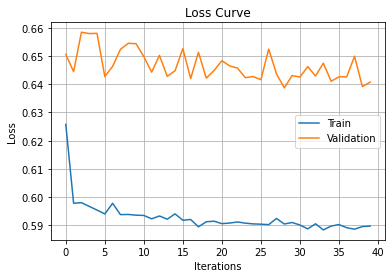

In [166]:
history = model.history.history
train_loss = history["loss"]
val_loss = history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0,1)
plt.legend(["Train", "Validation"])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid()
plt.show()

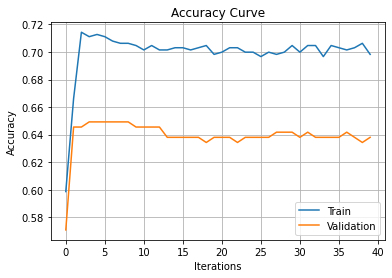

In [165]:
train_acc = history["accuracy"]
val_acc = history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
#plt.ylim(0,1)
plt.legend(["Train", "Validation"])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.grid()
plt.show()